In [82]:


import numpy as np 
import pandas as pd

In [83]:

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [84]:
# head() method showcased the initial rows, offering insight into column names and data format.
df = pd.read_csv('laptopPrice.csv')

In [85]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [86]:
df.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [87]:
# select few feature to predict the price of laptop
selected_columns = ['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
                    'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
                    'weight', 'warranty', 'Touchscreen', 'Price']
df_train = df[selected_columns]

In [88]:
# check Null values in data column
df_train.isnull().sum()

brand              0
processor_brand    0
processor_name     0
processor_gnrtn    0
ram_gb             0
ram_type           0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
warranty           0
Touchscreen        0
Price              0
dtype: int64

In [89]:
# checking for duplicated rows
df_train.duplicated().sum()

41

In [90]:
# check overview of columns, their data types, and non-null counts.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brand            823 non-null    object
 1   processor_brand  823 non-null    object
 2   processor_name   823 non-null    object
 3   processor_gnrtn  823 non-null    object
 4   ram_gb           823 non-null    object
 5   ram_type         823 non-null    object
 6   ssd              823 non-null    object
 7   hdd              823 non-null    object
 8   os               823 non-null    object
 9   os_bit           823 non-null    object
 10  graphic_card_gb  823 non-null    object
 11  weight           823 non-null    object
 12  warranty         823 non-null    object
 13  Touchscreen      823 non-null    object
 14  Price            823 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 96.6+ KB


In [91]:
# make to different variables for categorical and numerical feature identification
cat_val = df_train.select_dtypes(include=['object']).columns
num_val = df_train.select_dtypes(include=['int64']).columns

print(cat_val,'\n',num_val)

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen'],
      dtype='object') 
 Index(['Price'], dtype='object')


In [92]:
# check all unique values in features
for column in df_train.columns:
    unique_values = df_train[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'brand': ['ASUS' 'Lenovo' 'acer' 'Avita' 'HP' 'DELL' 'MSI' 'APPLE']
Unique values in column 'processor_brand': ['Intel' 'AMD' 'M1']
Unique values in column 'processor_name': ['Core i3' 'Core i5' 'Celeron Dual' 'Ryzen 5' 'Core i7' 'Core i9' 'M1'
 'Pentium Quad' 'Ryzen 3' 'Ryzen 7' 'Ryzen 9']
Unique values in column 'processor_gnrtn': ['10th' 'Not Available' '11th' '7th' '8th' '9th' '4th' '12th']
Unique values in column 'ram_gb': ['4 GB' '8 GB' '16 GB' '32 GB']
Unique values in column 'ram_type': ['DDR4' 'LPDDR4' 'LPDDR4X' 'DDR5' 'DDR3' 'LPDDR3']
Unique values in column 'ssd': ['0 GB' '512 GB' '256 GB' '128 GB' '1024 GB' '2048 GB' '3072 GB']
Unique values in column 'hdd': ['1024 GB' '0 GB' '512 GB' '2048 GB']
Unique values in column 'os': ['Windows' 'DOS' 'Mac']
Unique values in column 'os_bit': ['64-bit' '32-bit']
Unique values in column 'graphic_card_gb': ['0 GB' '2 GB' '4 GB' '6 GB' '8 GB']
Unique values in column 'weight': ['Casual' 'ThinNlight' 'Gaming']
Uniq

In [93]:
# Removed units ('GB', 'years', 'bit', etc.) from certain columns using string manipulation (str.replace) 
# and transformed them into appropriate numeric types (astype or pd.to_numeric)
df_train['ram_gb'] = df_train['ram_gb'].str.replace('GB','')
df_train['ssd'] = df_train['ssd'].str.replace('GB','')
df_train['hdd'] = df_train['hdd'].str.replace('GB','')
df_train['graphic_card_gb'] = df_train['graphic_card_gb'].str.replace('GB','')
df_train['os_bit'] = df_train['os_bit'].str.replace('-bit','')
df_train['warranty'] = df_train['warranty'].str.replace(r'\byears?\b', '', regex=True)
df_train['processor_gnrtn'] = df_train['processor_gnrtn'].str.replace('th','')


df_train['ram_gb'] = df_train['ram_gb'].astype('int32')
df_train['ssd'] = df_train['ssd'].astype('int32')
df_train['hdd'] = df_train['hdd'].astype('int32')
df_train['graphic_card_gb'] = df_train['graphic_card_gb'].astype('int32')
df_train['os_bit'] = df_train['os_bit'].astype('int32')

df_train.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,Price
0,ASUS,Intel,Core i3,10,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,34649
1,Lenovo,Intel,Core i3,10,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,38999
2,Lenovo,Intel,Core i3,10,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,39999
3,ASUS,Intel,Core i5,10,8,DDR4,512,0,Windows,32,2,Casual,No warranty,No,69990
4,ASUS,Intel,Celeron Dual,Not Available,4,DDR4,0,512,Windows,64,0,Casual,No warranty,No,26990


In [94]:
# Convert to numeric, 'Not Available' becomes NaN
df_train['processor_gnrtn'] = pd.to_numeric(df_train['processor_gnrtn'], errors='coerce')  # Convert to numeric, 'Not Available' becomes NaN
median_value = df_train['processor_gnrtn'].median()


In [95]:
df_train['processor_gnrtn'].fillna(median_value, inplace=True)
df_train['processor_gnrtn'] = df_train['processor_gnrtn'].astype(int)

In [96]:
df_train.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,Price
0,ASUS,Intel,Core i3,10,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,34649
1,Lenovo,Intel,Core i3,10,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,38999
2,Lenovo,Intel,Core i3,10,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,39999
3,ASUS,Intel,Core i5,10,8,DDR4,512,0,Windows,32,2,Casual,No warranty,No,69990
4,ASUS,Intel,Celeron Dual,11,4,DDR4,0,512,Windows,64,0,Casual,No warranty,No,26990


In [97]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brand            823 non-null    object
 1   processor_brand  823 non-null    object
 2   processor_name   823 non-null    object
 3   processor_gnrtn  823 non-null    int64 
 4   ram_gb           823 non-null    int32 
 5   ram_type         823 non-null    object
 6   ssd              823 non-null    int32 
 7   hdd              823 non-null    int32 
 8   os               823 non-null    object
 9   os_bit           823 non-null    int32 
 10  graphic_card_gb  823 non-null    int32 
 11  weight           823 non-null    object
 12  warranty         823 non-null    object
 13  Touchscreen      823 non-null    object
 14  Price            823 non-null    int64 
dtypes: int32(5), int64(2), object(8)
memory usage: 80.5+ KB


In [98]:
df_train.isnull().sum()

brand              0
processor_brand    0
processor_name     0
processor_gnrtn    0
ram_gb             0
ram_type           0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
warranty           0
Touchscreen        0
Price              0
dtype: int64

## EDA

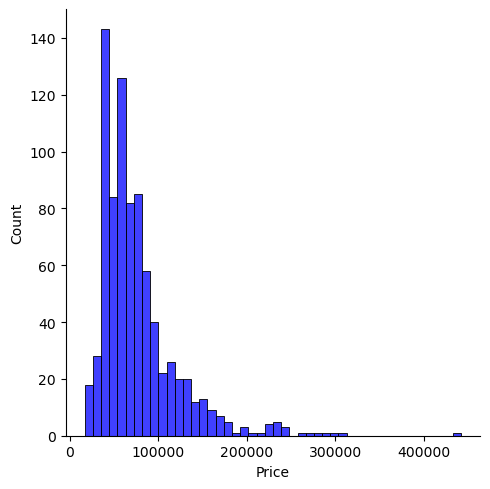

In [99]:
sns.displot(df['Price'],color='blue')

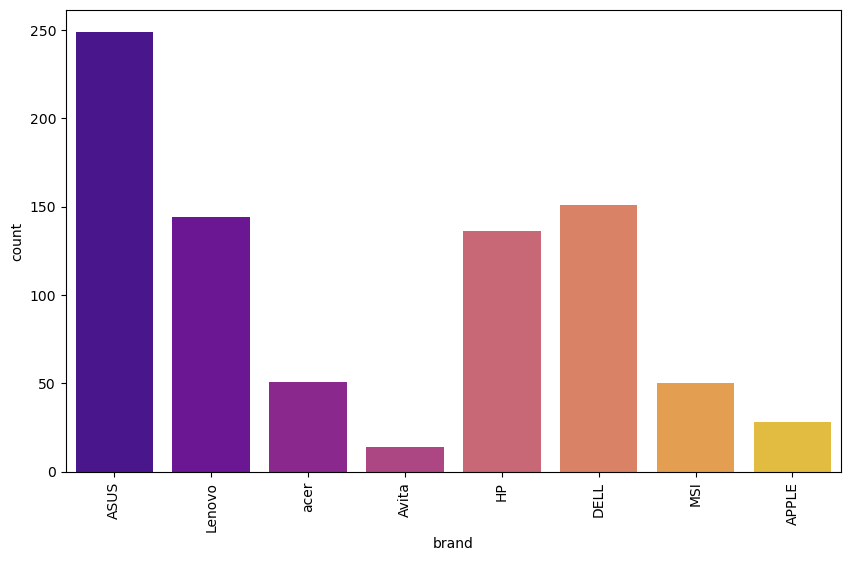

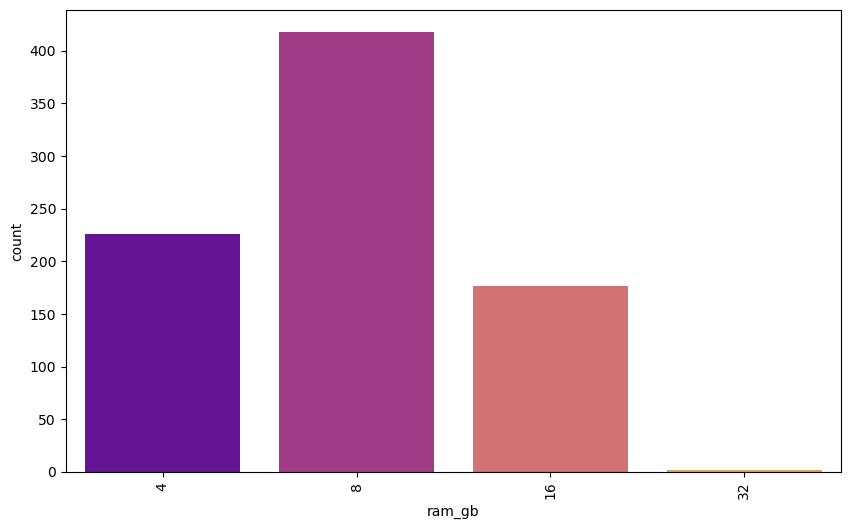

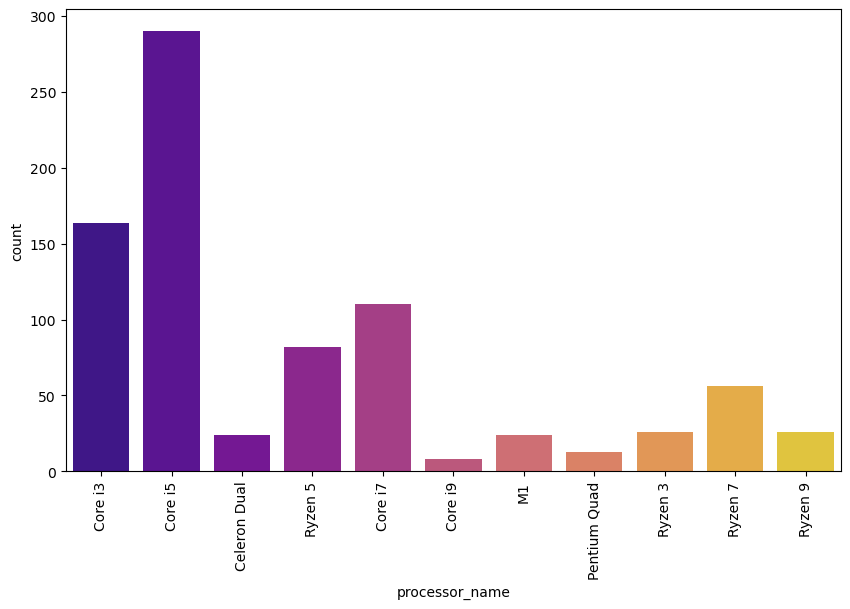

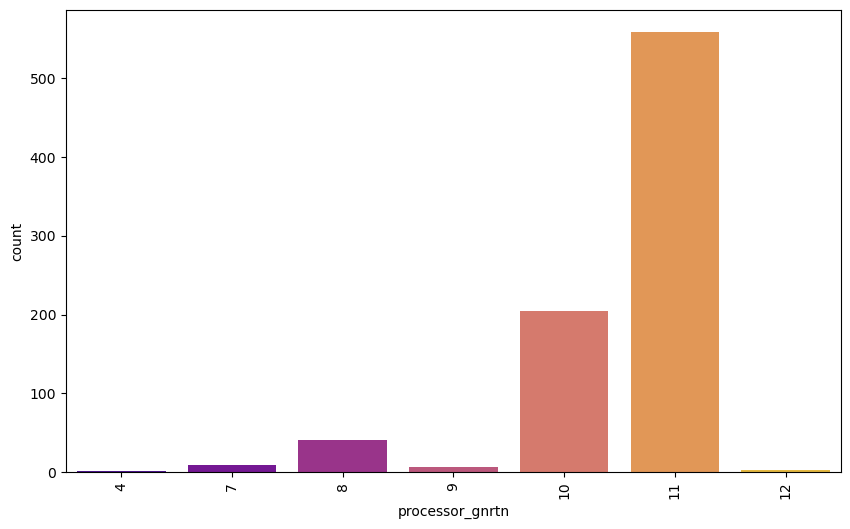

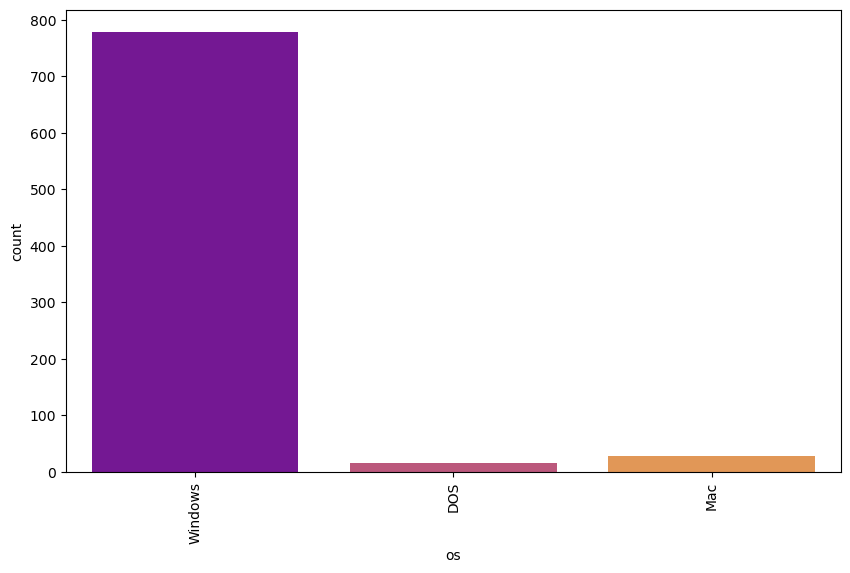

In [100]:
def dataplot(col):
    plt.figure(figsize= (10,6))
    sns.countplot(data = df_train, x=col, palette = 'plasma')
    plt.xticks(rotation = 'vertical')
    plt.show()
    
features = ['brand', 'ram_gb', 'processor_name', 'processor_gnrtn', 'os']

for col in features:
    dataplot(col)

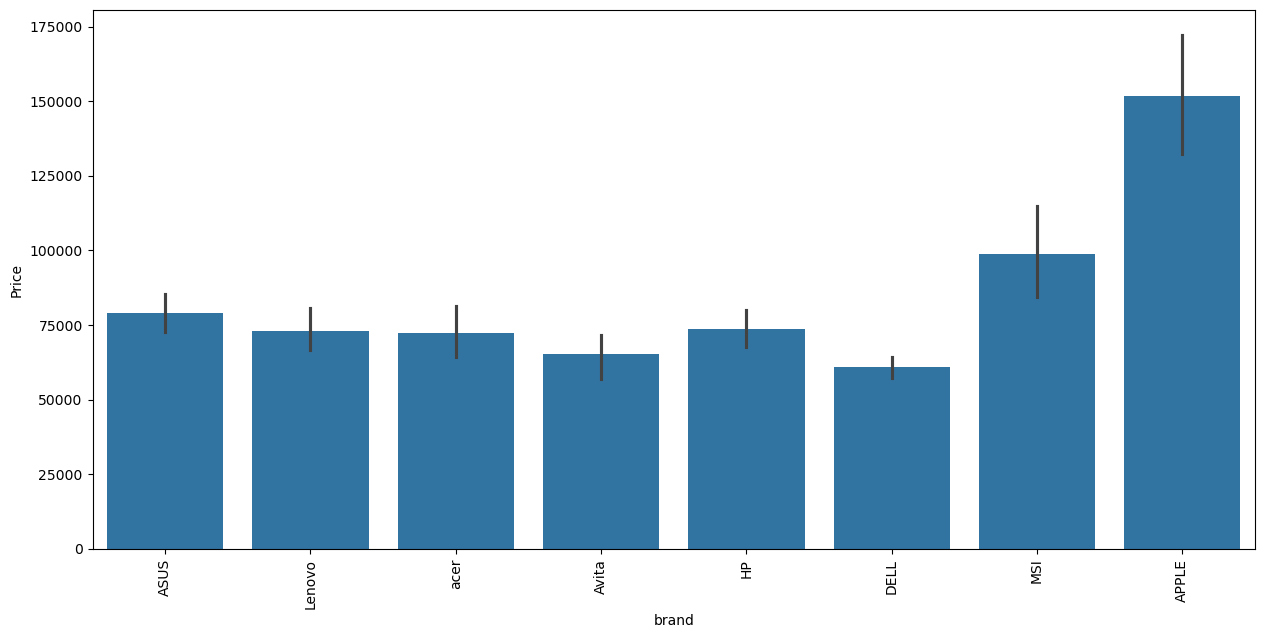

In [101]:
plt.figure(figsize=(15,7))
sns.barplot(x = df_train['brand'], y=df_train['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

#### Analysis on Touchscreen feature :

<Axes: xlabel='Touchscreen', ylabel='count'>

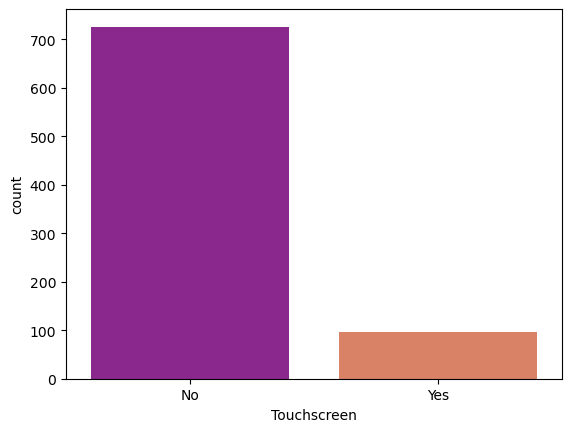

In [102]:
sns.countplot(df_train, x =df_train['Touchscreen'],palette='plasma')

<Axes: xlabel='Touchscreen', ylabel='Price'>

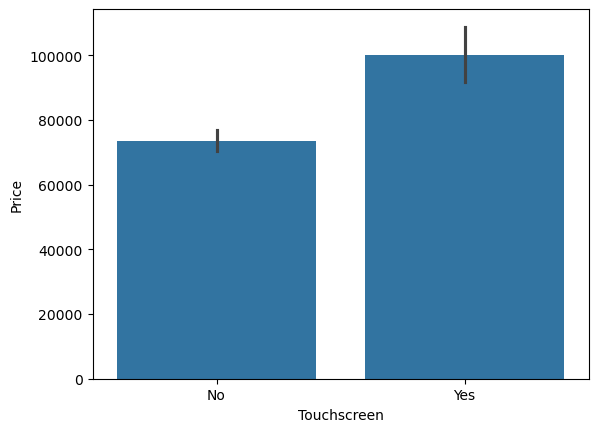

In [103]:
sns.barplot(x = df_train['Touchscreen'], y= df_train['Price'])

#### Analysis on Warranty feature :

<Axes: xlabel='warranty', ylabel='count'>

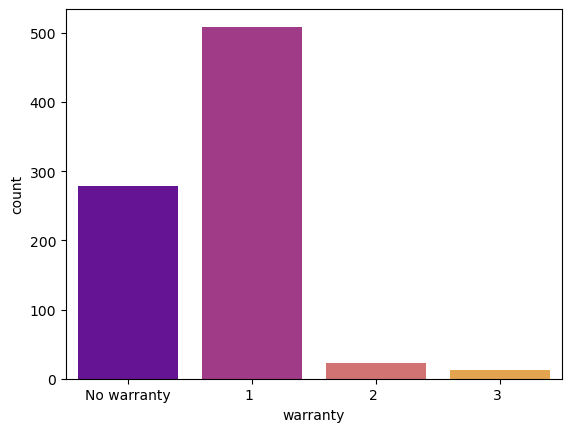

In [104]:
sns.countplot(df_train, x =df_train['warranty'],palette='plasma')

<Axes: xlabel='warranty', ylabel='Price'>

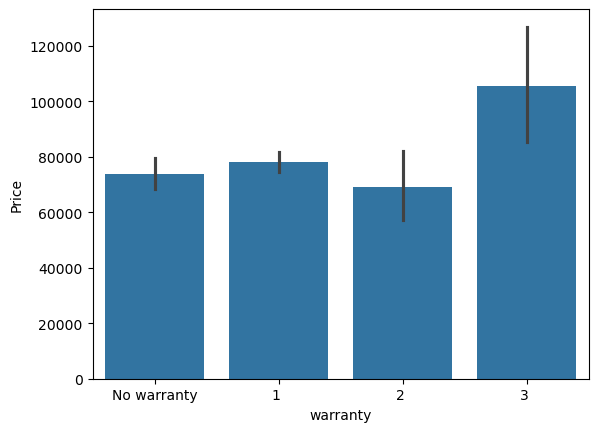

In [105]:
sns.barplot(x = df_train['warranty'], y= df_train['Price'])

#### Analysis on Weight feature :

<Axes: xlabel='weight', ylabel='count'>

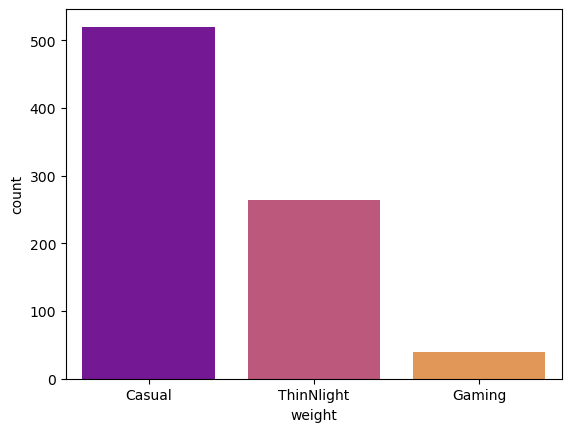

In [106]:
sns.countplot(df_train, x =df_train['weight'],palette='plasma')

<Axes: xlabel='weight', ylabel='Price'>

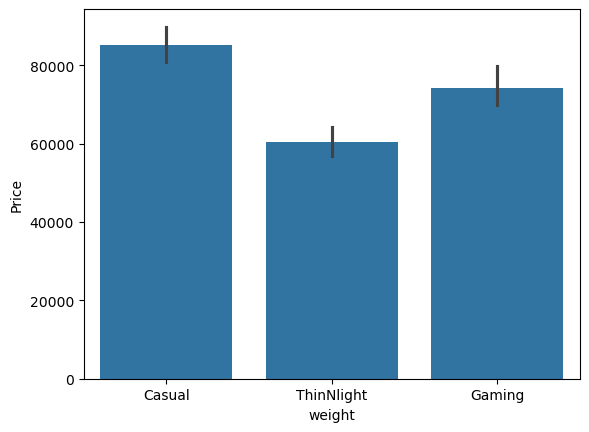

In [107]:
sns.barplot(x = df_train['weight'], y= df_train['Price'])

#### Analysis on RAM feature :

<Axes: xlabel='ram_gb', ylabel='count'>

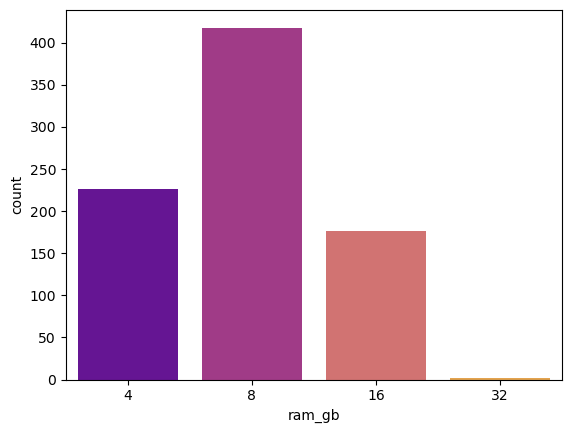

In [108]:
sns.countplot(df_train, x =df_train['ram_gb'],palette='plasma')

<Axes: xlabel='ram_gb', ylabel='Price'>

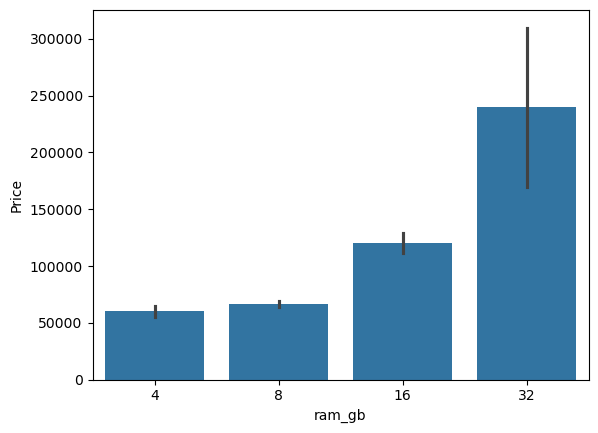

In [109]:
sns.barplot(x = df_train['ram_gb'], y= df_train['Price'])

In [110]:
df_train.sample(10)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,Price
597,MSI,Intel,Core i5,10,8,LPDDR4,0,512,DOS,32,4,Casual,No warranty,No,109590
526,Lenovo,Intel,Core i7,10,16,DDR4,512,0,Windows,32,2,Casual,No warranty,No,162399
496,MSI,Intel,Core i7,10,8,DDR4,512,0,Windows,64,0,ThinNlight,No warranty,No,57990
427,ASUS,Intel,Core i5,10,8,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,56990
677,Lenovo,AMD,Ryzen 5,11,8,DDR4,512,0,Windows,64,4,Gaming,No warranty,No,59490
72,HP,Intel,Core i3,11,4,DDR4,256,0,Windows,64,0,ThinNlight,1,No,42490
180,ASUS,Intel,Core i3,10,4,DDR4,256,1024,Windows,64,0,Casual,No warranty,No,40990
568,ASUS,Intel,Core i7,10,16,LPDDR3,1024,0,Windows,64,0,Casual,No warranty,No,167990
541,ASUS,Intel,Core i7,10,16,LPDDR3,1024,0,Windows,64,2,Casual,1,No,124990
184,DELL,Intel,Core i3,10,4,DDR4,256,1024,Windows,64,0,ThinNlight,1,No,44290


#### Analysis on Operating_system feature :

<Axes: xlabel='os', ylabel='count'>

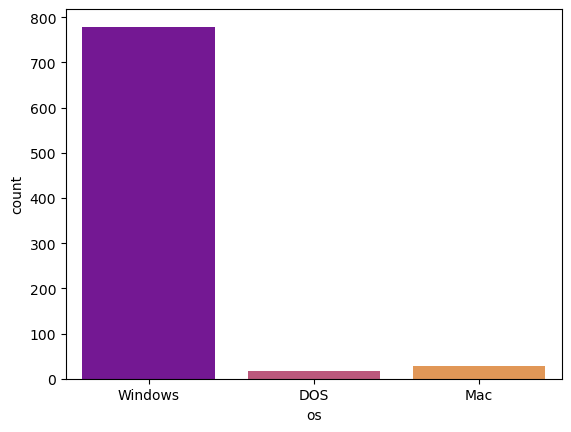

In [111]:
sns.countplot(df_train, x =df_train['os'],palette='plasma')

<Axes: xlabel='os', ylabel='Price'>

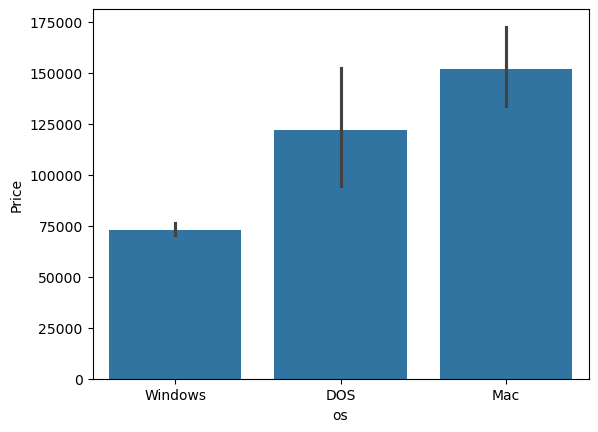

In [112]:
sns.barplot(x = df_train['os'], y= df_train['Price'])

#### Price Analysis

<Axes: xlabel='Price', ylabel='Density'>

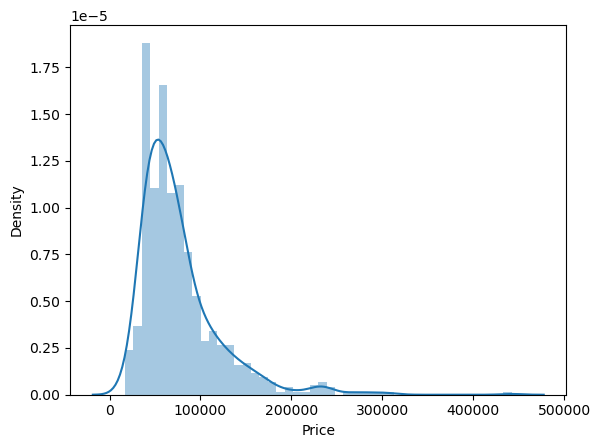

In [113]:
sns.distplot(df_train['Price'])

<Axes: xlabel='Price', ylabel='Density'>

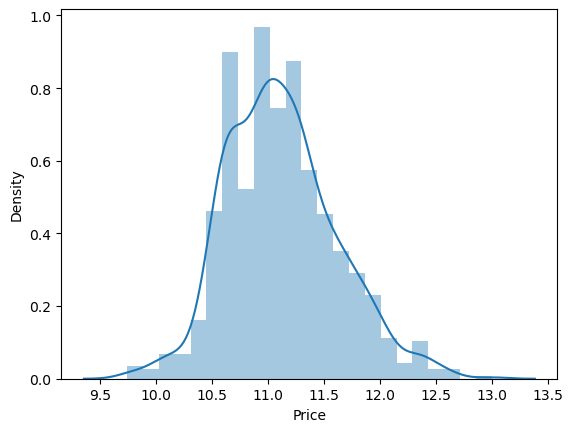

In [114]:
sns.distplot(np.log(df_train['Price']))

In [115]:
# sns.pairplot(df_train)

In [116]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brand            823 non-null    object
 1   processor_brand  823 non-null    object
 2   processor_name   823 non-null    object
 3   processor_gnrtn  823 non-null    int64 
 4   ram_gb           823 non-null    int32 
 5   ram_type         823 non-null    object
 6   ssd              823 non-null    int32 
 7   hdd              823 non-null    int32 
 8   os               823 non-null    object
 9   os_bit           823 non-null    int32 
 10  graphic_card_gb  823 non-null    int32 
 11  weight           823 non-null    object
 12  warranty         823 non-null    object
 13  Touchscreen      823 non-null    object
 14  Price            823 non-null    int64 
dtypes: int32(5), int64(2), object(8)
memory usage: 80.5+ KB


<Axes: >

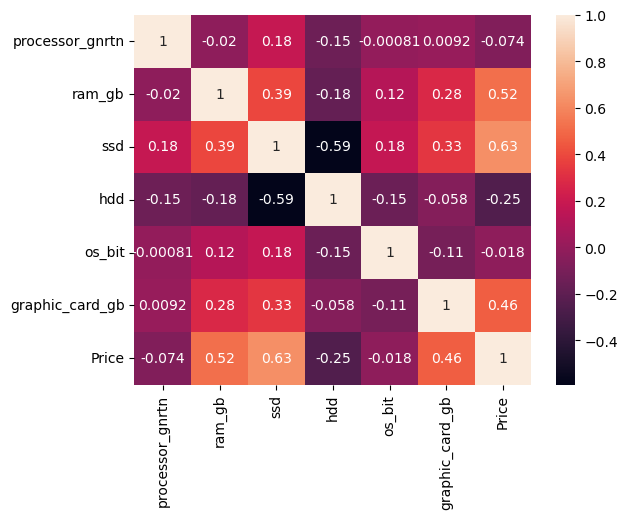

In [117]:
numeric_df = df_train.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)

### Model Building

In [118]:
x = df_train.drop(['Price'], axis=1)
y = np.log(df_train['Price'])

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [120]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 2)
X_train.shape, X_test.shape

((699, 14), (124, 14))

In [121]:
mapper = {i:value for i,value in enumerate(X_train.columns)}
mapper

{0: 'brand',
 1: 'processor_brand',
 2: 'processor_name',
 3: 'processor_gnrtn',
 4: 'ram_gb',
 5: 'ram_type',
 6: 'ssd',
 7: 'hdd',
 8: 'os',
 9: 'os_bit',
 10: 'graphic_card_gb',
 11: 'weight',
 12: 'warranty',
 13: 'Touchscreen'}

In [122]:
df_train.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,Price
0,ASUS,Intel,Core i3,10,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,34649
1,Lenovo,Intel,Core i3,10,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,38999
2,Lenovo,Intel,Core i3,10,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,39999
3,ASUS,Intel,Core i5,10,8,DDR4,512,0,Windows,32,2,Casual,No warranty,No,69990
4,ASUS,Intel,Celeron Dual,11,4,DDR4,0,512,Windows,64,0,Casual,No warranty,No,26990


In [123]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brand            823 non-null    object
 1   processor_brand  823 non-null    object
 2   processor_name   823 non-null    object
 3   processor_gnrtn  823 non-null    int64 
 4   ram_gb           823 non-null    int32 
 5   ram_type         823 non-null    object
 6   ssd              823 non-null    int32 
 7   hdd              823 non-null    int32 
 8   os               823 non-null    object
 9   os_bit           823 non-null    int32 
 10  graphic_card_gb  823 non-null    int32 
 11  weight           823 non-null    object
 12  warranty         823 non-null    object
 13  Touchscreen      823 non-null    object
 14  Price            823 non-null    int64 
dtypes: int32(5), int64(2), object(8)
memory usage: 80.5+ KB


## Linear Regression

In [124]:
np.exp(0.14778886769451385)

1.1592681115738217

## Ridge Regression

In [125]:

encoding = ColumnTransformer(transformers = [
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 2, 5, 8, 11, 12, 13])
], remainder='passthrough')

ridge = Ridge(alpha=10)

pipe = Pipeline([
    ('encoding', encoding),
    ('ridge', ridge)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

## LassoRegression

In [46]:

encoding = ColumnTransformer(transformers = [
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 2, 5, 8, 11, 12, 13])
], remainder='passthrough')

lasso = Lasso(alpha=0.001)

pipe = Pipeline([
    ('encoding', encoding),
    ('lasso', lasso)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.7894934505555293
MAE 0.14987325648985514


## Decision Tree

In [47]:

encoding = ColumnTransformer(transformers = [
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 2, 5, 8, 11, 12, 13])
], remainder='passthrough')

dtr = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('encoding', encoding),
    ('dtr', dtr)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.7474318146501708
MAE 0.16860112556237652


## Random Forest

In [48]:

encoding = ColumnTransformer(transformers = [
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 2, 5, 8, 11, 12, 13])
], remainder='passthrough')

random = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('encoding', encoding),
    ('random', random)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8276062297021033
MAE 0.13506213253935379


In [49]:
import pickle

pickle.dump(df_train,open('df_train.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [50]:
df_train.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,Price
0,ASUS,Intel,Core i3,10,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,34649
1,Lenovo,Intel,Core i3,10,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,38999
2,Lenovo,Intel,Core i3,10,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,39999
3,ASUS,Intel,Core i5,10,8,DDR4,512,0,Windows,32,2,Casual,No warranty,No,69990
4,ASUS,Intel,Celeron Dual,11,4,DDR4,0,512,Windows,64,0,Casual,No warranty,No,26990


## Hyperparameter Tuning for Random Forest 

In [51]:
indexlist = [0, 1, 2, 5, 8, 11, 12, 13]
transformlist = []
for key,value in mapper.items():
    if key in indexlist:
        transformlist.append(value)
        
transformlist

['brand',
 'processor_brand',
 'processor_name',
 'ram_type',
 'os',
 'weight',
 'warranty',
 'Touchscreen']

In [52]:
x = pd.get_dummies(x,columns=transformlist,drop_first=True)
x.head()

,processor_gnrtn,ram_gb,ssd,hdd,os_bit,graphic_card_gb,brand_ASUS,brand_Avita,brand_DELL,brand_HP,...,ram_type_LPDDR4,ram_type_LPDDR4X,os_Mac,os_Windows,weight_Gaming,weight_ThinNlight,warranty_2,warranty_3,warranty_No warranty,Touchscreen_Yes
0,10,4,0,1024,64,0,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,10,4,0,1024,64,0,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,10,4,0,1024,64,0,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,10,8,512,0,32,2,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,11,4,0,512,64,0,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [53]:
X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                   test_size=0.15,random_state=2)

X_train.shape,X_test.shape

((699, 38), (124, 38))

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
rfr = RandomForestRegressor()

In [56]:
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [57]:
grid_search = GridSearchCV(rfr, param_grid, cv=5, scoring='r2')

In [58]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]},
             scoring='r2')

In [59]:
print('Best hyper parameter :' , grid_search.best_params_)
print('Best model :' , grid_search.best_estimator_)

Best hyper parameter : {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 20}
Best model : RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_split=4,
                      n_estimators=20)


In [60]:
rfr =  RandomForestRegressor(bootstrap=False, max_features='log2', min_samples_split=4,
                      n_estimators=30)

In [61]:
rf_grid = rfr.fit(X_train,y_train)

In [62]:
y_pred_rfr_grid = rf_grid.predict(X_test)

In [63]:
print('R2 score',metrics.r2_score(y_test,y_pred_rfr_grid))
print('MAE',metrics.mean_absolute_error(y_test,y_pred_rfr_grid))

R2 score 0.82571169438382
MAE 0.14231597465920104


In [64]:
np.exp(0.1364875113056222)

1.1462405626383085

In [65]:
predicted = []
testtrain = np.array(x)
for i in range(len(testtrain)):
    predicted.append(rfr.predict([testtrain[i]]))
    
predicted

[array([10.49008612]),
 array([10.58222119]),
 array([10.58222119]),
 array([11.21546277]),
 array([10.09628365]),
 array([10.09628365]),
 array([10.04775132]),
 array([11.06867329]),
 array([10.77383567]),
 array([11.20077596]),
 array([11.25367958]),
 array([11.20077596]),
 array([9.84898641]),
 array([10.09628365]),
 array([10.5382686]),
 array([10.88379824]),
 array([11.0798745]),
 array([10.38961705]),
 array([10.68775274]),
 array([10.38961705]),
 array([10.53746637]),
 array([10.11715037]),
 array([10.63089236]),
 array([10.77798968]),
 array([10.48236142]),
 array([10.55804396]),
 array([10.55526377]),
 array([10.48881738]),
 array([10.60182326]),
 array([10.59754128]),
 array([10.88379824]),
 array([10.56809952]),
 array([10.56388221]),
 array([10.6122585]),
 array([10.60421065]),
 array([10.54849932]),
 array([10.6490391]),
 array([10.6122585]),
 array([10.60421065]),
 array([10.66264271]),
 array([10.59060387]),
 array([10.88080868]),
 array([10.52291272]),
 array([10.585875

In [66]:
ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [67]:
rounded_prices = [round(pred) for pred in ans]

In [68]:
df_train['Predicted Price'] = np.array(rounded_prices)
df_train

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,Price,Predicted Price
0,ASUS,Intel,Core i3,10,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,34649,35957
1,Lenovo,Intel,Core i3,10,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,38999,39428
2,Lenovo,Intel,Core i3,10,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,39999,39428
3,ASUS,Intel,Core i5,10,8,DDR4,512,0,Windows,32,2,Casual,No warranty,No,69990,74270
4,ASUS,Intel,Celeron Dual,11,4,DDR4,0,512,Windows,64,0,Casual,No warranty,No,26990,24253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,11,4,DDR4,1024,0,Windows,64,0,Casual,1,No,135990,127440
819,ASUS,AMD,Ryzen 9,11,4,DDR4,1024,0,Windows,64,0,Casual,1,No,144990,127440
820,ASUS,AMD,Ryzen 9,11,4,DDR4,1024,0,Windows,64,4,Casual,1,No,149990,151767
821,ASUS,AMD,Ryzen 9,11,4,DDR4,1024,0,Windows,64,4,Casual,1,No,142990,151767


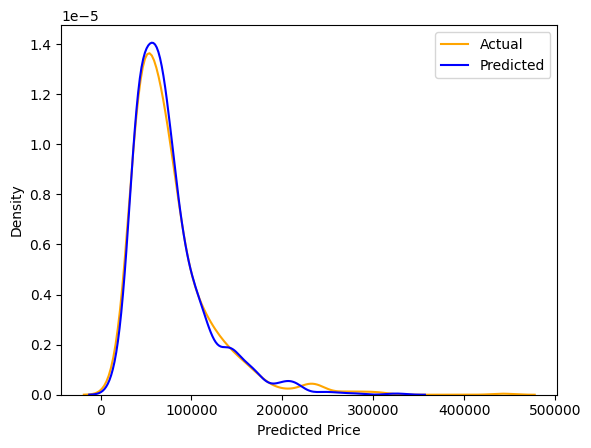

In [69]:
sns.distplot(df_train['Price'],hist=False,color='orange',label='Actual')
sns.distplot(df_train['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()